# SCC0570 - Introdução à Redes Neurais (ICMC - USP)

* Alef Segura Santos, 9762942
* Guatavo de Moura Souza, 9762981

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Input

In [2]:
dataset = pd.read_csv('semeion.data', sep=' ', lineterminator='\n', header=None).iloc[:,:-1]

### Amostra de imagens

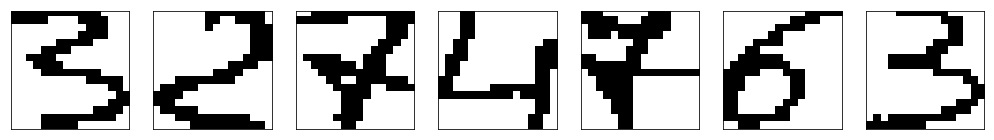

In [3]:
plt.figure(figsize=(20,5))
for i in range(1,8):
    plt.subplot(1,8,i)
    plt.imshow(dataset.iloc[:,:256].sample().values.reshape(16,16), cmap='binary');
    plt.xticks([])
    plt.yticks([])

# Perceptron Multicamada

In [406]:
class PerceptronMulticamada:
    
    # Configuração inicial da Rede Neural
    def __init__(self, learning_rate=0.5, n_input=1, hidden_layers=(3,3), n_output=1, treshold=1e-4):
        n_input += 1
        hidden_layers = tuple([x+1 for x in hidden_layers])
        self.layers = (n_input,) + hidden_layers + (n_output,)
        self.learning_rate = learning_rate
        self.weights = [np.random.uniform(-0.5,0.5,[self.layers[i]-1,self.layers[i-1]]) for i in range(1,len(self.layers)-1)]
        self.weights.append(np.random.uniform(-0.5,0.5,[self.layers[-1],self.layers[-2]]))
        self.treshold = treshold
        
    # Imprime as camadas e os pesos
    def get_net(self):
        print(self.layers[0])
        for w,n in zip(self.weights,self.layers[1:]):
            print(w.tolist())
            print(n)
            
    # Treinamento
    def fit(self, X, y):
        print('época | erro')
        erro_medio = 1
        n = 0
        while(erro_medio>self.treshold):
            erro_epoca = []
            for v,label in zip(X,y):
                states = [v]
                for i in range(1,len(self.layers)):
                    v = self.forward(v,self.weights[i-1])
                    states.append(v)
                erro = v[0] - label
                erro_epoca.append(erro)
                print(self.weights)
                print(states)
                self.backpropagate(erro,states,self.learning_rate)
                print(self.weights)
            erro_medio = np.mean(erro_epoca)
            print(str(n) + ' | ' + str(erro_medio))
            n += 1
        
    # Feedforward
    def forward(self, X, weights):
        X = np.insert(X,0,1)
        return [self.sigmoide(np.sum(X*w)) for w in weights]

    # Previsão
    def predict(self, X):
        prediction = []
        for x in X:
            for i in range(1,len(self.layers)):
                x = self.forward(x,self.weights[i-1])
            prediction.append(x)
        return prediction
    
    # Backpropagation do erro
    def backpropagate(self,erro,states,learning_rate):
        new_weights = []
        for i,j in zip(range(len(self.weights)-1, -1, -1,),range(len(states)-2, -1, -1)):
            states[j] = np.insert(states[j],0,1)
            new_weights_layer = []
            for w in self.weights[i]:
                if erro < 0:
                    w = np.array([a+a*s*learning_rate for a,s in zip(w,states[j])])
                if erro > 0:
                    w = np.array([a-a*s*learning_rate for a,s in zip(w,states[j])])
                new_weights_layer = new_weights_layer + [w]
            new_weights = [new_weights_layer] + new_weights
        self.weights = new_weights

    # Activation function 
    def sigmoide(self, s):
        return 1 if s > 0 else 0
        #return 1/(1+np.exp(-s))

## Teste

In [407]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [1,0,0,1]
mlp = PerceptronMulticamada(n_input=2, hidden_layers=(1,1), n_output=1, learning_rate=0.3, treshold=0.1)
mlp.fit(X,y)

época | erro
[array([[-0.40976565,  0.06516995,  0.38257921]]), array([[-0.26048412, -0.21993268]]), array([[-0.17444514, -0.06459902]])]
[[0, 0], [0], [0], [0]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[0, 1], [0], [0], [0]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[1, 0], [0], [0], [0]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[array([-0.53269534,  0.06516995,  0.38257921])], [array([-0.33862936, -0.21993268])], [array([-0.22677869, -0.06459902])]]
[[1, 1], [0], [0], [0]]
[[array([-0.6925

In [352]:
mlp.predict([[0,0],[0,1],[1,0],[1,1]])

[[0.5741036715961233],
 [0.57410767992807465],
 [0.57411507117169136],
 [0.57411903819328214]]

# Aplicação
## Reconhecendo dígitos manuscritos

In [416]:
X = dataset.iloc[:,:256].values
y = dataset.iloc[:,256:].values

In [16]:
rn = PerceptronMulticamada(n_input=256, n_output=10, hidden_layers=(1,))
rn.get_net()

257
[[0.5571506863052986, 0.44904335053103483, 0.2920593622537462, 0.36912301748385346, 0.9376523066866433, 0.6975289170493307, 0.1547446994993843, 0.3702460809850662, 0.3871368890875203, 0.15146766087828623, 0.4125685083141146, 0.11520469457087046, 0.4514850169973461, 0.40406331862136846, 0.12429581116684751, 0.2379890186644512, 0.36736932511581677, 0.32295790497518906, 0.9782686051288556, 0.821515730338392, 0.21960657800194106, 0.6456289704586986, 0.5131658838537251, 0.3930722508710739, 0.2891190680158503, 0.305562306172805, 0.5741707727100612, 0.3210557888394807, 0.6800048625619949, 0.8169362471993195, 0.9662072330463399, 0.2138756550763682, 0.026612526127412717, 0.5130602984590922, 0.924740158978576, 0.9091730592688486, 0.14880811534879546, 0.9310559159869265, 0.035409266126415595, 0.3996525899275861, 0.7131002000704243, 0.38083709529565923, 0.891888367229493, 0.5221318155083373, 0.43677094109362746, 0.7819007310167653, 0.2551599730878136, 0.21728414261454665, 0.9740180250420658, 0